<a href="https://colab.research.google.com/github/Rbcirne/pso_pratica/blob/master/PSO_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício PSO - Inteligência de Exames
##Aluno: Renato Barbosa Cirne

In [0]:
import pandas as pd
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt
from google.colab import files

# Funções

##Função Sphere

In [0]:
def sphere( x ):
    x = np.asarray(x)
    return sum( x**2 ) # soma do elementos ao quadrado até a dimensão len(x)

## Função Rastrigin

In [0]:
def rastrigin(x):
  x = np.asarray(x)
  result=[]
  n=len(x)
  for i in range(n):
    result.append(x[i]**2 - 10 * np.cos(2 * math.pi * x[i]) + 10)
  return sum( result )

##Função Rosenbrock

In [0]:
def rosenbrock( x ):
  x = np.asarray(x)
  result=[]
  n=len(x)
  for i in range(1,n-1):
    result.append(100*(x[i+1]-x[i]**2)**2+(x[i]-1)**2)
  return sum( result ) 

##Array dimensão dim gerado aleatoriamente com range (minimo,maximo)

In [0]:
def exemplo(minimo,maximo,dim):
  x = np.random.rand(dim)*(maximo-minimo)+minimo
  return x

# PSO Algorithm - Global Topology

In [0]:
  def pso_global(func, lmin, lmax, D, n_particulas,n_inter,w=0.9,c1=2.05,c2=2.05):
    S = n_particulas
    wmax=w
    wmin=0.2
    x=[]
    y=[]
    p=[]
    for i in range(S):
      p.append(exemplo(lmin,lmax,D))  # posição inicial das partículas

    v = np.zeros_like(p)  # velocidade das partículas
    b = np.zeros_like(p)  # melhores posições das particulas
    
    for i in range(S):
      v[i]=exemplo(0,1,D)  # velocidade inicial das partículas

    fp = np.zeros(S)  # Atual função das partículas
    fb = np.ones(S)*np.inf  # Melhores valores da função
    
    fg = np.inf  # Iniciando a melhor posição do enxame 
    
    for j in range(n_inter): #realiza a otimização para um dado nº de interações
      
      #Atualiza as melhores posições e resultados de cada particula
      for i in range(S):
          fp[i] = func(p[i]) #calcula o resultado da particula
          if fp[i]<fb[i]:
            b[i]=p[i] #atualiza a melhor posição da particula
            fb[i]=fp[i] #atualiza o melhor resultado da particula
            

      # Atualiza a melhor posição e resultado geral do enxame
      fg=min(fp) # função minimo global
      g=np.argmin(fp) #posição do minimo global
      
      # Atualização a velocidade e posições
      for i in range(S):
          r1 = np.random.uniform()
          r2 = np.random.uniform()
          v[i] = w*v[i] + c1*r1*(b[i] - p[i]) + c2*r2*(b[g] - p[i]) #calcula a nova velocidade
          p[i]=p[i]+v[i] #atualiza a nova posição
          
          p[i]=np.where(p[i]<lmax,p[i],lmax) #limita a posição máxima
          p[i]=np.where(p[i]>lmin,p[i],lmin) #limita a posição mínima
          
      # Atualiza a melhor posição e resultado geral do enxame
      fg=min(fp) #minimo
      g=np.argmin(fp) #posição do minimo
      w=wmax-j*(wmax-wmin)/n_inter
      x.append(j)
      y.append(fg)
        
    return y
        

#PSO Algorithim - Global Topology - Sem decaimento

In [0]:
 def pso_global_const(func, lmin, lmax, D, n_particulas,n_inter,w=0.8,c1=2.05,c2=2.05):
    S = n_particulas
    
    
    x=[]
    y=[]
    p=[]
    for i in range(S):
      p.append(exemplo(lmin,lmax,D))  # posição inicial das partículas

    v = np.zeros_like(p)  # velocidade das partículas
    b = np.zeros_like(p)  # melhores posições das particulas
    
    for i in range(S):
      v[i]=exemplo(0,1,D)  # velocidade inicial das partículas

    fp = np.zeros(S)  # Atual função das partículas
    fb = np.ones(S)*np.inf  # Melhores valores da função
    
    fg = np.inf  # Iniciando a melhor posição do enxame 
    
    for j in range(n_inter): #realiza a otimização para um dado nº de interações
      
      #Atualiza as melhores posições e resultados de cada particula
      for i in range(S):
          fp[i] = func(p[i]) #calcula o resultado da particula
          if fp[i]<fb[i]:
            b[i]=p[i] #atualiza a melhor posição da particula
            fb[i]=fp[i] #atualiza o melhor resultado da particula
            

      # Atualiza a melhor posição e resultado geral do enxame
      fg=min(fp) # função minimo global
      g=np.argmin(fp) #posição do minimo global
      
      # Atualização a velocidade e posições
      for i in range(S):
          r1 = np.random.uniform()
          r2 = np.random.uniform()
          v[i] = w*v[i] + c1*r1*(b[i] - p[i]) + c2*r2*(b[g] - p[i]) #calcula a nova velocidade
          p[i]=p[i]+v[i] #atualiza a nova posição
          
          p[i]=np.where(p[i]<lmax,p[i],lmax) #limita a posição máxima
          p[i]=np.where(p[i]>lmin,p[i],lmin) #limita a posição mínima
          
      # Atualiza a melhor posição e resultado geral do enxame
      fg=min(fp) #minimo
      g=np.argmin(fp) #posição do minimo
      
      x.append(j)
      y.append(fg)
        
    return y

#PSO Algorithm - Global Topology - Clerc

In [0]:
def clerc(z):
    x = 2/np.absolute(2 - z - (z*2 - 4*z)*1/2)
    return x

In [0]:
 def pso_global_clerc(func, lmin, lmax, D, n_particulas,n_inter,w=0.9,c1=2.05,c2=2.05):
    S = n_particulas
    wmax=w
    wmin=0.2
    x=[]
    y=[]
    p=[]
    for i in range(S):
      p.append(exemplo(lmin,lmax,D))  # posição inicial das partículas

    v = np.zeros_like(p)  # velocidade das partículas
    b = np.zeros_like(p)  # melhores posições das particulas
    
    for i in range(S):
      v[i]=exemplo(0,1,D)  # velocidade inicial das partículas

    fp = np.zeros(S)  # Atual função das partículas
    fb = np.ones(S)*np.inf  # Melhores valores da função
    
    fg = np.inf  # Iniciando a melhor posição do enxame 
    
    for j in range(n_inter): #realiza a otimização para um dado nº de interações
      
      #Atualiza as melhores posições e resultados de cada particula
      for i in range(S):
          fp[i] = func(p[i]) #calcula o resultado da particula
          if fp[i]<fb[i]:
            b[i]=p[i] #atualiza a melhor posição da particula
            fb[i]=fp[i] #atualiza o melhor resultado da particula
            

      # Atualiza a melhor posição e resultado geral do enxame
      fg=min(fp) # função minimo global
      g=np.argmin(fp) #posição do minimo global
      
      # Atualização a velocidade e posições
      for i in range(S):
          r1 = np.random.uniform()
          r2 = np.random.uniform()
          v[i] = clerc(c1+c2)*(w*v[i] + c1*r1*(b[i] - p[i]) + c2*r2*(b[g] - p[i])) #calcula a nova velocidade
          p[i]=p[i]+v[i] #atualiza a nova posição
          
          p[i]=np.where(p[i]<lmax,p[i],lmax) #limita a posição máxima
          p[i]=np.where(p[i]>lmin,p[i],lmin) #limita a posição mínima
          
      # Atualiza a melhor posição e resultado geral do enxame
      fg=min(fp) #minimo
      g=np.argmin(fp) #posição do minimo
      w=wmax-j*(wmax-wmin)/n_inter
      x.append(j)
      y.append(fg)
        
    return y

#PSO Algorithm - Local Topology

In [0]:
def pso_local(func, lmin, lmax, D, n_particulas,n_inter,w=0.9,c1=2.05,c2=2.05):
    S = n_particulas
    wmax=w
    wmin=0.2
    
    x=[] # resultado n° interações
    y=[] # resultado otimização
    
    p=[] # posição inicial das partículas
    for i in range(S):
      p.append(exemplo(lmin,lmax,D))  # posição inicial das partículas

    v = np.zeros_like(p)  # velocidade das partículas
    b = np.zeros_like(p)  # melhores posições das particulas
    
    for i in range(S):
      v[i]=exemplo(0,1,D)  # velocidade inicial das partículas

    fp = np.zeros(S)  # Atual função das partículas
    fb = np.ones(S)*np.inf  # Melhores valores da função
    
    fv = np.ones(S)*np.inf  # Iniciando a melhor posição da vizinhança
    fg = np.inf # Iniciando a melhor posição do enxame
    
    viz = np.ones(S)*np.inf
    
      
    for j in range(n_inter): #realiza a otimização para um dado nº de interações
      
      #Atualiza as melhores posições e resultados de cada particula
      for i in range(S):
          fp[i] = func(p[i]) #calcula o resultado da particula
          
          if fp[i]<fb[i]:
            b[i]=p[i] #atualiza a melhor posição da particula
            fb[i]=fp[i] #atualiza o melhor resultado da particula
            
      
      # Atualiza a melhor posição e resultado geral da vizinhança
      for i in range(S):
        fv[i]=min(fp[(i-1)%S],fp[i],fp[(i+1)%S])
        if fv[i]==fp[(i-1)%S]:
          viz[i]=(i-1)%S #posição do minimo da vizinhança
        elif fv[i]==fp[i]:
          viz[i]=i #posição do minimo da vizinhança
        else:
          viz[i]=(i+1)%S #posição do minimo da vizinhança
        #print(viz[i]) 
        
        
      
      # Atualização a velocidade
      for i in range(S):
          r1 = np.random.uniform()
          r2 = np.random.uniform()
       
          v[i] = w*v[i] + c1*r1*(b[i] - p[i]) + c2*r2*(b[viz[i].astype(int)] - p[i]) #calcula a nova velocidade
          p[i]=p[i]+v[i] #atualiza a nova posição
          
          p[i]=np.where(p[i]<lmax,p[i],lmax) #limita a posição máxima
          p[i]=np.where(p[i]>lmin,p[i],lmin) #limita a posição mínima
      
      # Atualiza a melhor posição e resultado geral da vizinhança
      for i in range(S):
        fv[i]=min(fp[(i-1)%S],fp[i],fp[(i+1)%S])
      
      fg=min(fv)
      
      
      w=wmax-j*(wmax-wmin)/n_inter # função de decaimento
      
      x.append(j)
      y.append(fg)
        
    return y

# PSO Algorithm - Focal Topology

In [0]:
def pso_focal(func, lmin, lmax, D, n_particulas,n_inter,w=0.9,c1=2.05,c2=2.05):
    S = n_particulas
    wmax=w
    wmin=0.2
    
    x=[] # resultado n° interações
    y=[] # resultado otimização
    
    p=[] # posição inicial das partículas
    for i in range(S):
      p.append(exemplo(lmin,lmax,D))  # posição inicial das partículas

    v = np.zeros_like(p)  # velocidade das partículas
    b = np.zeros_like(p)  # melhores posições das particulas
    
    for i in range(S):
      v[i]=exemplo(0,1,D)  # velocidade inicial das partículas

    fp = np.zeros(S)  # Atual função das partículas
    fb = np.ones(S)*np.inf  # Melhores valores da função
    
    fv = np.ones(S)*np.inf  # Iniciando a melhor posição da vizinhança
    fg = np.inf # Iniciando a melhor posição do enxame
    
    focal=rd.randint(0,S-1)   # seleção da partícula focal
      
    for j in range(n_inter): #realiza a otimização para um dado nº de interações
      
      #Atualiza as melhores posições e resultados de cada particula
      for i in range(S):
          fp[i] = func(p[i]) #calcula o resultado da particula
          
          if fp[i]<fb[i]:
            b[i]=p[i] #atualiza a melhor posição da particula
            fb[i]=fp[i] #atualiza o melhor resultado da particula
            
      
    # Atualiza a melhor posição e resultado geral do enxame
      fg=min(fp) # função minimo global
      g=np.argmin(fp) #posição do minimo global
      
      # Atualização a velocidade
      for i in range(S):
          r1 = np.random.uniform()
          r2 = np.random.uniform()
          #if i!=focal: 
          v[i] = w*v[i] + c1*r1*(p[focal] - p[i]) + c2*r2*(b[g] - p[i]) #calcula a nova velocidade
          p[i]=p[i]+v[i] #atualiza a nova posição

          p[i]=np.where(p[i]<lmax,p[i],lmax) #limita a posição máxima
          p[i]=np.where(p[i]>lmin,p[i],lmin) #limita a posição mínima
      
      # Atualiza a melhor posição e resultado geral do enxame
      fg=min(fp) # função minimo global
      g=np.argmin(fp) #posição do minimo global
                
      #fg=func(p[focal])
      
      
      w=wmax-j*(wmax-wmin)/n_inter # função de decaimento
      
      x.append(j)
      y.append(fg)
        
    return y

#Configurações

In [0]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

## Boxplot

In [0]:
def boxplot_exp(resultado,titulo,x1,x2,x3):
  fig1, ax1 = plt.subplots()
  ax1.set_title(titulo,fontsize=18)
  plt.yscale('log')
  plt.grid(True)
  ax1.boxplot(resultado,labels=[x1,x2,x3])
  return

## Gráfico em Linha

###Média

In [0]:
def media(rosen,sphe,rast):
    rosen_m=rosen.transpose()
    rosen_m=rosen_m.mean()
    sphe_m=sphe.transpose()
    sphe_m=sphe_m.mean()
    rast_m=rast.transpose()
    rast_m=rast_m.mean()
    return rosen_m,sphe_m,rast_m

### Gráfico

In [0]:
 def linha(titulo,media1,media2,media3,var1,var2,var3):
  plt.yscale('log')
  plt.grid(True)
  plt.ylabel('Fitness',fontsize=18)
  plt.title(titulo,fontsize=18)
  
  plt.plot(media1,'r-', media2,'b-',media3,'y-',linewidth=1.0)
  plt.legend( (var1, var2, var3),loc='upper right', shadow=True,fontsize=18)
  plt.show()
  return

#Análise 1 - PSO Argorithim Padrão

In [0]:
def exp_padrao(n_exp, D, n_part,n_inter):
  
  # resultados dos x experimentos
  rosen_g=pd.DataFrame(pso_global(rosenbrock,-30,30,D,n_part,n_inter),columns=[0])
  sphe_g=pd.DataFrame(pso_global(sphere,-100,100,D,n_part,n_inter),columns=[0])
  rast_g=pd.DataFrame(pso_global(rastrigin,-5.12,5.12,30,D,n_inter),columns=[0])
  for i in range(1,n_exp+1):
    rosen_g=pd.concat([rosen_g, pd.DataFrame(pso_global(rosenbrock,-30,30,D,n_part,n_inter),columns=[i])], axis=1, sort=False)
    sphe_g=pd.concat([sphe_g,pd.DataFrame(pso_global(sphere,-100,100,D,n_part,n_inter),columns=[i])], axis=1, sort=False)
    rast_g=pd.concat([rast_g,pd.DataFrame(pso_global(rastrigin,-5.12,5.12,D,n_part,n_inter),columns=[i])], axis=1, sort=False)    
  return rosen_g,sphe_g,rast_g

##Análise 1 - Resultados

In [0]:
rosen, sphe, rast = exp_padrao(30,30,30,10000)
resultado=pd.concat([rosen.tail(1),sphe.tail(1),rast.tail(1)])

rosen_m,sphe_m,rast_m=media( rosen,sphe,rast)

boxplot_exp(resultado,'Análise 1 - PSO Padrão por Função','Rosenbrock','Sphere','Rastrigin')
plt.show()

linha('Análise 1 - Evolução Média da Função Fitness com PSO Padrão por Função',rosen_m,sphe_m,rast_m,'Rosenbrock','Sphere','Rastrigin')
plt.show()

## Análise 1 - Download Dados

In [0]:
rosen.to_csv('rosen.csv',sep=";")
files.download('rosen.csv')
sphe.to_csv('sphe.csv',sep=";")
files.download('sphe.csv')
rast.to_csv('rast.csv',sep=";")
files.download('rast.csv')

#Análise 2 - Parâmetro de Velocidade

In [0]:
def experiment_veloc(func,n_exp,D,n_part,n_inter):
  
  if func==rastrigin:
    lmin=-5.12
  elif func==sphere:
    lmin=-100
  elif func==rosenbrock:
    lmin=-30
  else:
    print ('função incorreta')
  
  lmax=-lmin
  # resultados dos x experimentos
  rast_g=pd.DataFrame(pso_global_const(func,lmin,lmax,D,n_part,n_inter),columns=[0])
  rast_l=pd.DataFrame(pso_global(func,lmin,lmax,D,n_part,n_inter),columns=[0])
  rast_f=pd.DataFrame(pso_global_clerc(func,lmin,lmax,D,n_part,n_inter),columns=[0])
  for i in range(1,n_exp+1):
    rast_g=pd.concat([rast_g, pd.DataFrame(pso_global_const(func,lmin,lmax,D,n_part,n_inter),columns=[i])], axis=1, sort=False)
    rast_l=pd.concat([rast_l,pd.DataFrame(pso_global(func,lmin,lmax,D,n_part,n_inter),columns=[i])], axis=1, sort=False)
    rast_f=pd.concat([rast_f,pd.DataFrame(pso_global_clerc(func,lmin,lmax,D,n_part,n_inter),columns=[i])], axis=1, sort=False)  
              
  return rast_g,rast_l,rast_f

##Rastrigin

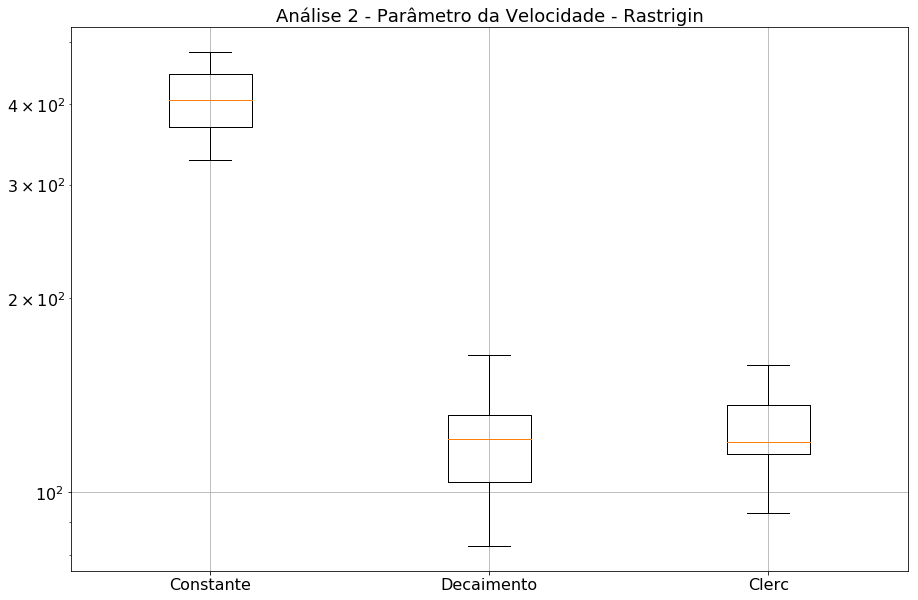

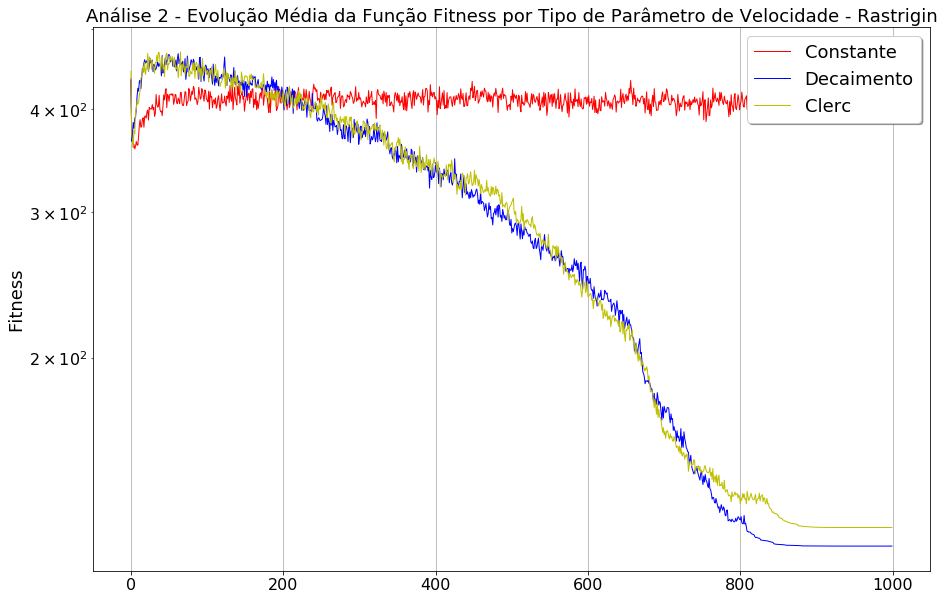

In [0]:
func_c,func_d,func_clerc=experiment_veloc(rastrigin,30,30,30,10000)
resultado2=pd.concat([func_c.tail(1),func_d.tail(1),func_clerc.tail(1)])
boxplot_exp(resultado2,'Análise 2 - Parâmetro da Velocidade - Rastrigin','Constante','Decaimento','Clerc')
plt.show()

func_c_m,func_d_m,func_clerc_m = media(func_c,func_d,func_clerc)
linha('Análise 2 - Evolução Média da Função Fitness por Tipo de Parâmetro de Velocidade - Rastrigin',func_c_m,func_d_m,func_clerc_m ,'Constante','Decaimento','Clerc')
plt.show()

In [0]:
func_c.to_csv('func_c_rastrigin.csv',sep=";")
files.download('func_c_rastrigin.csv')
func_d.to_csv('func_d_rastrigin.csv',sep=";")
files.download('func_d_rastrigin.csv')
func_clerc.to_csv('func_clerc_rastrigin.csv',sep=";")
files.download('func_clerc_rastrigin.csv')

##Sphere

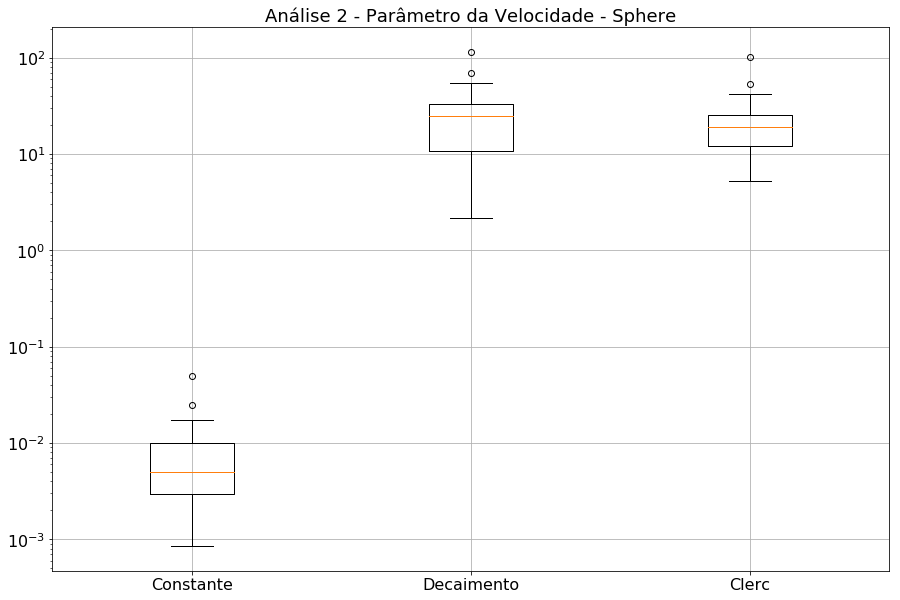

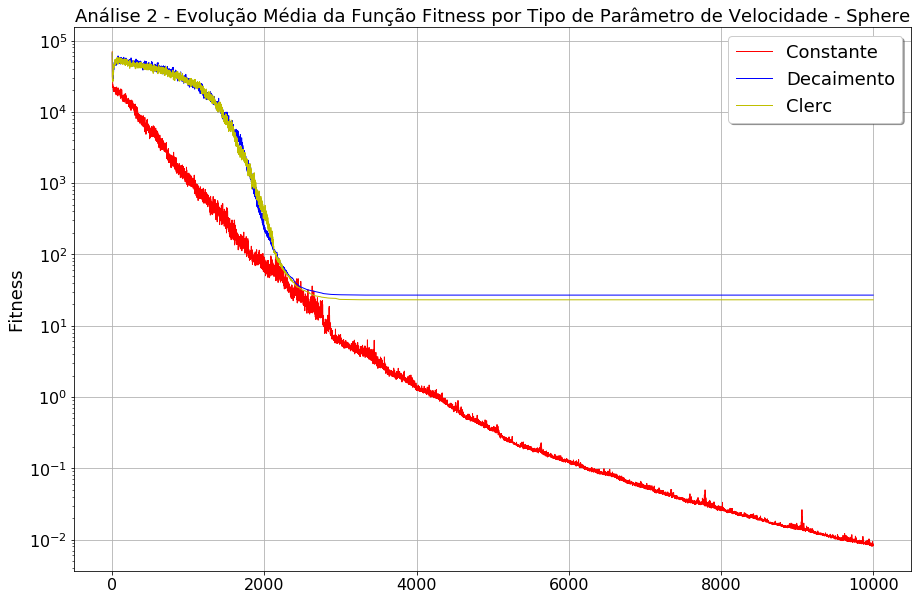

In [18]:
func_c,func_d,func_clerc=experiment_veloc(sphere,30,30,30,10000)
resultado2=pd.concat([func_c.tail(1),func_d.tail(1),func_clerc.tail(1)])
boxplot_exp(resultado2,'Análise 2 - Parâmetro da Velocidade - Sphere','Constante','Decaimento','Clerc')
plt.show()

func_c_m,func_d_m,func_clerc_m = media(func_c,func_d,func_clerc)
linha('Análise 2 - Evolução Média da Função Fitness por Tipo de Parâmetro de Velocidade - Sphere',func_c_m,func_d_m,func_clerc_m ,'Constante','Decaimento','Clerc')
plt.show()

In [0]:
func_c.to_csv('func_c_sphere.csv',sep=";")
files.download('func_c_sphere.csv')
func_d.to_csv('func_d_sphere.csv',sep=";")
files.download('func_d_sphere.csv')
func_clerc.to_csv('func_clerc_sphere.csv',sep=";")
files.download('func_clerc_sphere.csv')

##Rosenbrock

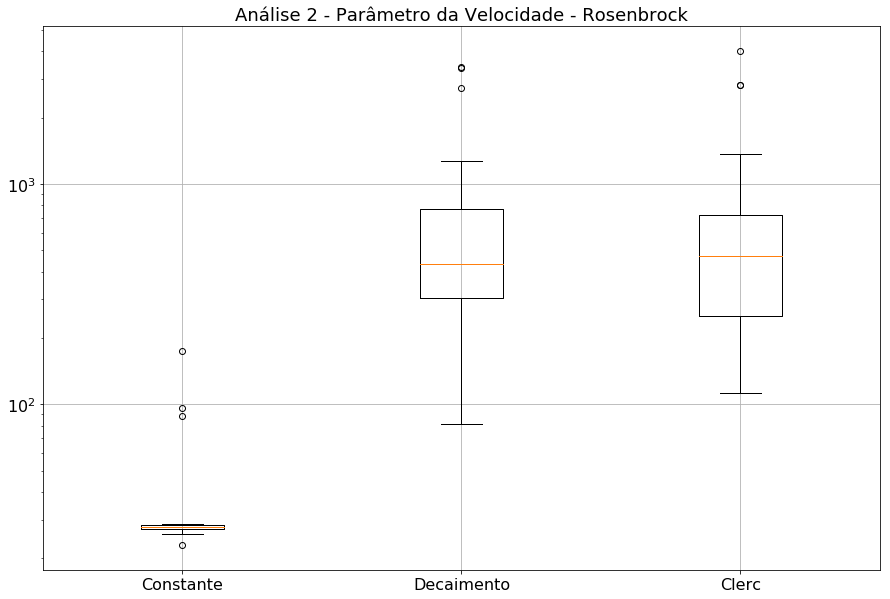

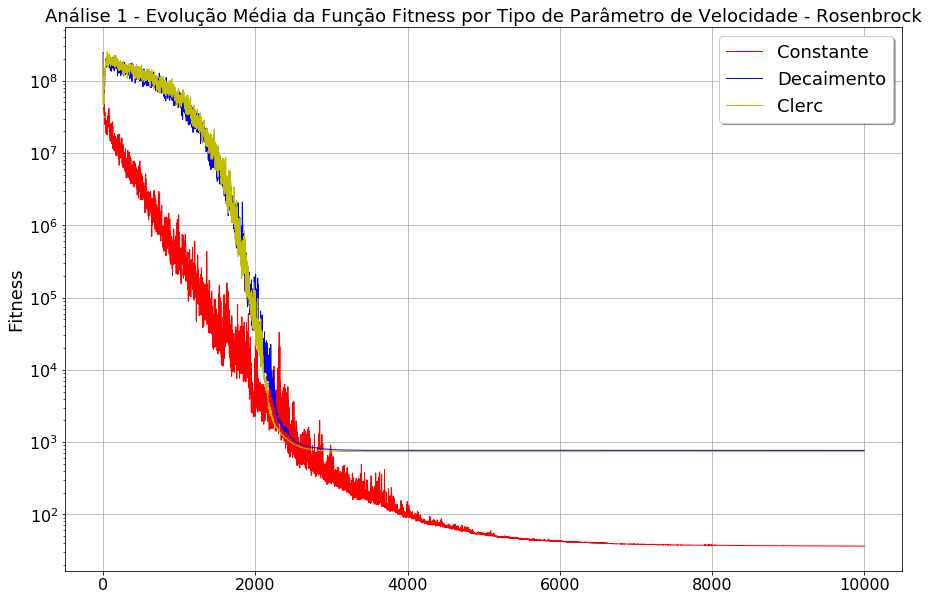

In [20]:
func_c,func_d,func_clerc=experiment_veloc(rosenbrock,30,30,30,10000)
resultado2=pd.concat([func_c.tail(1),func_d.tail(1),func_clerc.tail(1)])
boxplot_exp(resultado2,'Análise 2 - Parâmetro da Velocidade - Rosenbrock','Constante','Decaimento','Clerc')
plt.show()

func_c_m,func_d_m,func_clerc_m = media(func_c,func_d,func_clerc)
linha('Análise 1 - Evolução Média da Função Fitness por Tipo de Parâmetro de Velocidade - Rosenbrock',func_c_m,func_d_m,func_clerc_m ,'Constante','Decaimento','Clerc')
plt.show()

In [0]:
func_c.to_csv('func_c_rosenbrock.csv',sep=";")
files.download('func_c_rosenbrock.csv')
func_d.to_csv('func_d_rosenbrock.csv',sep=";")
files.download('func_d_rosenbrock.csv')
func_clerc.to_csv('func_clerc_rosenbrock.csv',sep=";")
files.download('func_clerc_rosenbrock.csv')

#Análise 3 - Topologia

In [0]:
def experiment_topo(func,n_exp,D,n_part,n_inter):
  
  if func==rastrigin:
    lmin=-5.12
  elif func==sphere:
    lmin=-100
  elif func==rosenbrock:
    lmin=-30
  else:
    print ('função incorreta')
    end()
  
  lmax=-lmin
  # resultados dos x experimentos
  rast_g=pd.DataFrame(pso_global(func,lmin,lmax,D,n_part,n_inter),columns=[0])
  rast_l=pd.DataFrame(pso_local(func,lmin,lmax,D,n_part,n_inter),columns=[0])
  rast_f=pd.DataFrame(pso_focal(func,lmin,lmax,D,n_part,n_inter),columns=[0])
  for i in range(1,n_exp+1):
    rast_g=pd.concat([rast_g, pd.DataFrame(pso_global(func,lmin,lmax,D,n_part,n_inter),columns=[i])], axis=1, sort=False)
    rast_l=pd.concat([rast_l,pd.DataFrame(pso_local(func,lmin,lmax,D,n_part,n_inter),columns=[i])], axis=1, sort=False)
    rast_f=pd.concat([rast_f,pd.DataFrame(pso_focal(func,lmin,lmax,D,n_part,n_inter),columns=[i])], axis=1, sort=False)  
              
  return rast_g,rast_l,rast_f

##Rosenbrock

In [0]:
func_c,func_d,func_clerc=experiment_topo(rosenbrock,30,30,30,10000)

resultado2=pd.concat([func_c.tail(1),func_d.tail(1),func_clerc.tail(1)])
boxplot_exp(resultado2,'Análise 3 - Topologia - Rosenbrock','Global','Local','Focal')
plt.show()

func_c_m,func_d_m,func_clerc_m = media(func_c,func_d,func_clerc)
linha('Análise 3 - Evolução Média da Função Fitness por Topologia - Rosenbrock',func_c_m,func_d_m,func_clerc_m ,'Global','Local','Focal')
plt.show()

In [0]:
func_c.to_csv('func_g_rosenbrock.csv',sep=";")
files.download('func_g_rosenbrock.csv')
func_d.to_csv('func_l_rosenbrock.csv',sep=";")
files.download('func_l_rosenbrock.csv')
func_clerc.to_csv('func_f_rosenbrock.csv',sep=";")
files.download('func_f_rosenbrock.csv')

##Sphere

In [0]:
func_c,func_d,func_clerc=experiment_topo(sphere,30,30,30,10000)

resultado2=pd.concat([func_c.tail(1),func_d.tail(1),func_clerc.tail(1)])
boxplot_exp(resultado2,'Análise 3 - Topologia - Sphere','Global','Local','Focal')
plt.show()

func_c_m,func_d_m,func_clerc_m = media(func_c,func_d,func_clerc)
linha('Análise 3 - Evolução Média da Função Fitness por Topologia - Sphere',func_c_m,func_d_m,func_clerc_m ,'Global','Local','Focal')
plt.show()

In [0]:
func_c.to_csv('func_g_sphere.csv',sep=";")
files.download('func_g_sphere.csv')
func_d.to_csv('func_l_sphere.csv',sep=";")
files.download('func_l_sphere.csv')
func_clerc.to_csv('func_f_sphere.csv',sep=";")
files.download('func_f_rosenbrock.csv')

##Rastrigin

In [0]:
func_c,func_d,func_clerc=experiment_topo(rastrigin,30,30,30,10000)

resultado2=pd.concat([func_c.tail(1),func_d.tail(1),func_clerc.tail(1)])
boxplot_exp(resultado2,'Análise 3 - Topologia - Rastrigin','Global','Local','Focal')
plt.show()

func_c_m,func_d_m,func_clerc_m = media(func_c,func_d,func_clerc)
linha('Análise 3 - Evolução Média da Função Fitness por Topologia - Rastrigin',func_c_m,func_d_m,func_clerc_m ,'Global','Local','Focal')
plt.show()

In [0]:
func_c.to_csv('func_g_rastrigin.csv',sep=";")
files.download('func_g_rastrigin.csv')
func_d.to_csv('func_l_rastrigin.csv',sep=";")
files.download('func_l_rastrigin.csv')
func_clerc.to_csv('func_f_rastrigin.csv',sep=";")
files.download('func_f_rastrigin.csv')